In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

In [2]:
sf18 = pd.read_csv("sf18_cleaned.csv")
sf18.head()

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration [s],Date_s,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
0,0,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,2018-01-31,2,22,2018-02-01,3,19,37.761420,-122.426435,37.783521,-122.431158
1,1,2018-01-31 16:13:35,2018-02-01 15:57:18,15,15,San Francisco Ferry Building (Harry Bridges Pl...,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,85423.0,2018-01-31,2,16,2018-02-01,3,15,37.795392,-122.394203,37.795392,-122.394203
2,2,2018-01-31 14:23:56,2018-02-01 10:16:53,304,296,Jackson St at 5th St,5th St at Virginia St,3039,Customer,71577.0,2018-01-31,2,14,2018-02-01,3,10,37.348759,-121.894798,37.325998,-121.877120
3,3,2018-01-31 14:53:24,2018-02-01 07:51:21,75,47,Market St at Franklin St,4th St at Harrison St,321,Customer,61077.0,2018-01-31,2,14,2018-02-01,3,7,37.773793,-122.421239,37.780955,-122.399749
4,4,2018-01-31 19:52:25,2018-02-01 06:58:32,74,19,Laguna St at Hayes St,Post St at Kearny St,617,Subscriber,39967.0,2018-01-31,2,19,2018-02-01,3,6,37.776435,-122.426244,37.788975,-122.403452


In [4]:
sf18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842144 entries, 0 to 1842143
Data columns (total 20 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         int64  
 4   end_station_id           int64  
 5   start_station_name       object 
 6   end_station_name         object 
 7   bike_id                  int64  
 8   user_type                object 
 9   duration [s]             float64
 10  Date_s                   object 
 11  Weekday_s                int64  
 12  Hour_s                   int64  
 13  Date_e                   object 
 14  Weekday_e                int64  
 15  Hour_e                   int64  
 16  start_station_latitude   float64
 17  start_station_longitude  float64
 18  end_station_latitude     float64
 19  end_station_longitude    float64
dtypes: float64(5), int64(8), object(7)
memory usag

In [8]:
sf18 = sf18.rename(columns=lambda x: x.replace('duration [s]', 'duration_s'))

In [11]:
sf18.head()

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,duration_s,...,Weekday_s,Hour_s,Date_e,Weekday_e,Hour_e,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,minutes
0,0,2018-01-31 22:52:36,2018-02-01 19:47:20,120,285,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber,75284.0,...,2,22,2018-02-01,3,19,37.761420,-122.426435,37.783521,-122.431158,1254.733333
1,1,2018-01-31 16:13:35,2018-02-01 15:57:18,15,15,San Francisco Ferry Building (Harry Bridges Pl...,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer,85423.0,...,2,16,2018-02-01,3,15,37.795392,-122.394203,37.795392,-122.394203,1423.716667
2,2,2018-01-31 14:23:56,2018-02-01 10:16:53,304,296,Jackson St at 5th St,5th St at Virginia St,3039,Customer,71577.0,...,2,14,2018-02-01,3,10,37.348759,-121.894798,37.325998,-121.877120,1192.950000
3,3,2018-01-31 14:53:24,2018-02-01 07:51:21,75,47,Market St at Franklin St,4th St at Harrison St,321,Customer,61077.0,...,2,14,2018-02-01,3,7,37.773793,-122.421239,37.780955,-122.399749,1017.950000
4,4,2018-01-31 19:52:25,2018-02-01 06:58:32,74,19,Laguna St at Hayes St,Post St at Kearny St,617,Subscriber,39967.0,...,2,19,2018-02-01,3,6,37.776435,-122.426244,37.788975,-122.403452,666.116667


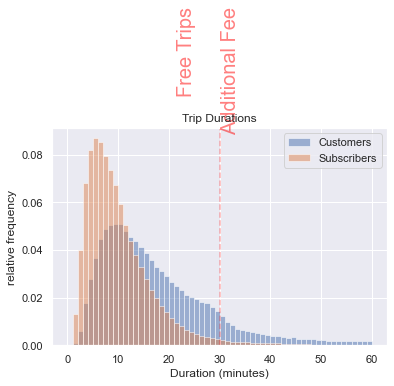

In [16]:
sf18['minutes'] = sf18.duration_s / 60
sf18.groupby('user_type')['minutes'].hist(bins=np.arange(61), alpha=0.5, density=True, stacked=True);
plt.xlabel('Duration (minutes)')
plt.ylabel('relative frequency')
plt.title('Trip Durations')
plt.text(34, 0.09, "Free Trips\n\nAdditional Fee", ha='right',
         size=20, rotation=90, alpha=0.5, color='red')
plt.legend(['Customers', 'Subscribers'])

plt.axvline(30, linestyle='--', color='red', alpha=0.3);